In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np

In [2]:
df = pd.read_csv("shopping_trends_updated1.csv")

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [179]:
df["Color"].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [305]:
df.describe()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1949.500000,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,1125.977353,15.207589,23.685392,0.716223,14.447125
min,0.000000,1.000000,18.000000,20.000000,2.500000,1.000000
25%,974.750000,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1949.500000,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2924.250000,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3899.000000,3900.000000,70.000000,100.000000,5.000000,50.000000


In [75]:
df.describe(include='O')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [76]:
df.isnull().any()

Customer ID                 False
Age                         False
Gender                      False
Item Purchased              False
Category                    False
Purchase Amount (USD)       False
Location                    False
Size                        False
Color                       False
Season                      False
Review Rating               False
Subscription Status         False
Payment Method              False
Shipping Type               False
Discount Applied            False
Promo Code Used             False
Previous Purchases          False
Preferred Payment Method    False
Frequency of Purchases      False
dtype: bool

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

In [78]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [307]:
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,tops,50s,South
1,1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,tops,10-20s,Northeast
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,bottoms,50s,Northeast
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,shoes,10-20s,Northeast
4,4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,tops,40s,West


Numeric 컬럼 상관계수
피어슨, 스피어만 , 켄달 타우 모두 비슷하게 매우 낮은 값

In [80]:
df.corr(numeric_only=True)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


In [182]:
df.loc[:, ['Age', 'Purchase Amount (USD)', 'Review Rating']].corr(method='pearson')

,Age,Purchase Amount (USD),Review Rating
Age,1.000000,-0.010424,-0.021949
Purchase Amount (USD),-0.010424,1.000000,0.030776
Review Rating,-0.021949,0.030776,1.000000


Boolean 값 (Yes, No) / 성별 1, 0으로 치환

In [83]:
df1 = df.copy()

In [4]:
df1.loc[df['Discount Applied']== 'Yes', 'Discount Applied'] = 1
df1.loc[df['Promo Code Used']== 'Yes', 'Promo Code Used'] = 1

df1.loc[df['Discount Applied']== 'No', 'Discount Applied'] = 0
df1.loc[df['Promo Code Used']== 'No', 'Promo Code Used'] = 0


In [5]:
df1.loc[df['Gender']=='Male', 'Gender'] = 1
df1.loc[df['Gender']=='Female', 'Gender'] = 0 

In [34]:
df1.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,...,Frequency of Purchases,Item Purchased_new,Age_group,location_new,Previous Purchases Score,Frequency Purchases Score,Total_Amount,Total_Purchases_Amount_Score,Total Score,Customer Type
0,0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,...,Fortnightly,tops,50s,South,2,4,795,2,8,Regural Customer
1,1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,...,Fortnightly,tops,10-20s,Northeast,1,4,192,1,6,New Customer
2,2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,...,Weekly,bottoms,50s,Northeast,3,5,1752,4,12,Loyal Customer
3,3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,...,Weekly,shoes,10-20s,Northeast,5,5,4500,5,15,Loyal Customer
4,4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,...,Annually,tops,40s,West,4,1,1568,3,8,Regural Customer


결제수단, 이전구입

In [ ]:
df1.groupby('Payment Method')['Previous Purchases'].sum()

상품 색상 별 별점


In [66]:
color = df1.groupby(['Item Purchased', 'Color'])['Review Rating'].mean()

In [ ]:
sns.catplot(x = 'Color', y='Review Rating', data=color)

지역별 판매액 총합

In [ ]:
df1.groupby('Location')['Purchase Amount (USD)'].sum().sort_values()

상품의 쿠폰 사용 여부 별 별점 중간값

In [ ]:
df1.groupby(['Item Purchased', 'Promo Code Used'])['Review Rating'].median()

전체 상품별 별점 중간값

In [ ]:
df1.groupby('Item Purchased')['Review Rating'].median()

In [ ]:
df1.groupby(['Frequency of Purchases', 'Item Purchased']).size()

계절별 카테고리 판매량



In [6]:

seasonal_trends = df1.groupby(['Season', 'Category'])['Purchase Amount (USD)'].count().unstack().fillna(0)

<Axes: xlabel='Category', ylabel='count'>

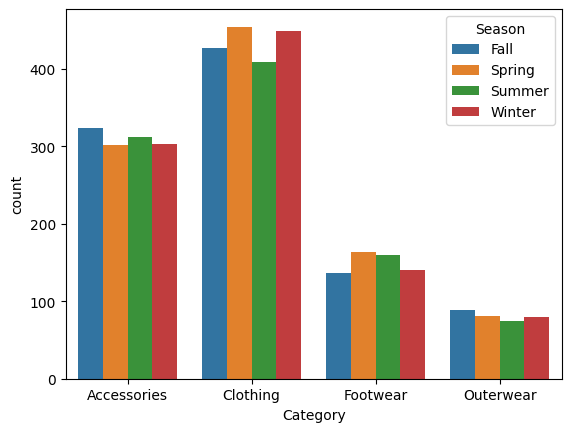

In [8]:
data_long = seasonal_trends.reset_index().melt(id_vars='Season', var_name='Category', value_name='count')

sns.barplot(data=data_long, x='Category', y='count', hue='Season')

별점 분포 ( 0~5 단계라 낮음 구간을 조금 넓게 잡았습니다.)

In [81]:
df1['Review Rating Category'] = pd.cut(df1['Review Rating'], bins=[0, 3.1, 4.1, 5], labels=['low', 'middle', 'high'])
review_rating_relationship = df1.groupby('Review Rating Category')['Purchase Amount (USD)'].count()

/tmp/ipykernel_814/1228966779.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_rating_relationship = df1.groupby('Review Rating Category')['Purchase Amount (USD)'].count()


In [86]:
df['Review Rating Category'] = pd.cut(df1['Review Rating'], bins=[0, 3.1, 4.1, 5], labels=['low', 'middle', 'high'])

In [40]:
df_rrc = pd.DataFrame(review_rating_relationship).reset_index()
df_rrc.columns = ['Review Rating Category', 'Purchase Amount (USD)']

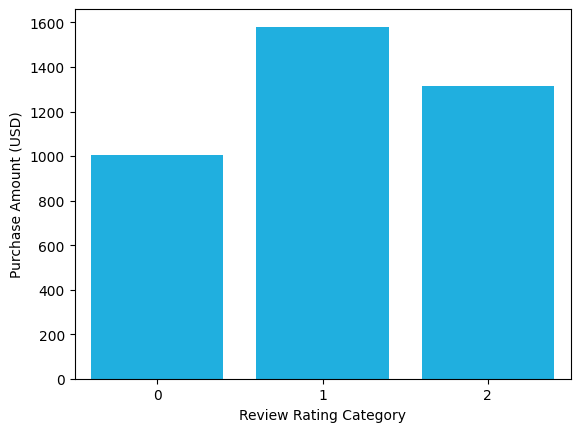

In [11]:
sns.barplot( x= 'Review Rating Category', y='Purchase Amount (USD)', data= df_rrc, color='deepskyblue')
plt.show()

구독 여부와 이전 구매 

In [12]:
subscription_status_relationship_mean = df1.groupby('Subscription Status')['Previous Purchases'].mean()
subscription_status_relationship_sum = df1.groupby('Subscription Status')['Previous Purchases'].sum()
subscription_status_relationship_median= df1.groupby('Subscription Status')['Previous Purchases'].median()

구독 여부 시각화


평균

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

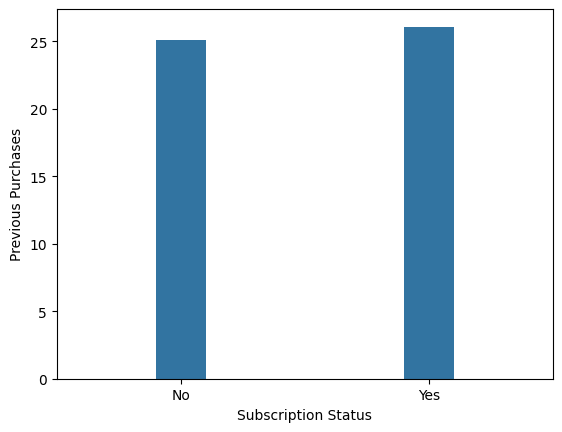

In [195]:
sns.barplot(subscription_status_relationship_mean, width=0.2)

중앙값

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

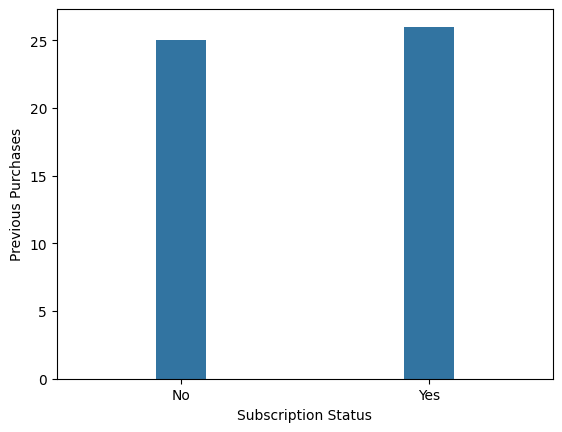

In [196]:
sns.barplot(subscription_status_relationship_median, width=0.2)

총합

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

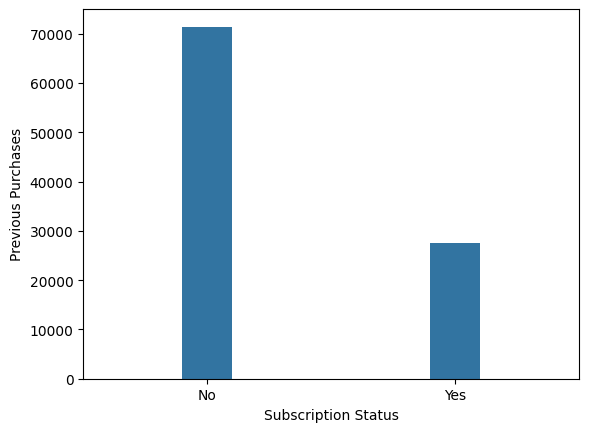

In [134]:
sns.barplot(subscription_status_relationship_sum, width=0.2)

In [13]:
df1.groupby('Frequency of Purchases')['Customer ID'].count()

Frequency of Purchases
Annually          572
Bi-Weekly         547
Every 3 Months    584
Fortnightly       542
Monthly           553
Quarterly         563
Weekly            539
Name: Customer ID, dtype: int64

In [35]:
df1.loc[df['Frequency of Purchases']=="Every 3 Months", 'Frequency of Purchases'] = 'Quarterly'

In [36]:
df1.loc[df['Frequency of Purchases']=="Bi-Weekly", 'Frequency of Purchases'] = 'Fortnightly'

In [41]:
df1.loc[df['Frequency of Purchases']=='Annually', 'Frequency of Purchases'] = 0
df1.loc[df['Frequency of Purchases']=='Quarterly', 'Frequency of Purchases'] = 1
df1.loc[df['Frequency of Purchases']=='Monthly', 'Frequency of Purchases'] = 2
df1.loc[df['Frequency of Purchases']=='Fortnightly', 'Frequency of Purchases'] = 3
df1.loc[df['Frequency of Purchases']=='Weekly', 'Frequency of Purchases'] = 4


In [42]:
df_a = df1.loc[:, ['Customer ID', 'Purchase Amount (USD)',  'Previous Purchases',  'Frequency of Purchases', 'Review Rating Category']]

In [45]:
df1['Frequency of Purchases'].unique()

array([3, 4, 0, 1, 2], dtype=object)

In [44]:
df1.loc[df1['Frequency of Purchases']=='Quarterly', 'Frequency of Purchases'] = 1
df1.loc[df1['Frequency of Purchases']=='Fortnightly', 'Frequency of Purchases'] = 3

In [49]:
pp_q75 = df1['Previous Purchases'].quantile(0.75)
pp_q50 = df1['Previous Purchases'].quantile(0.5)
pp_q25 = df1['Previous Purchases'].quantile(0.25)

def Previous_Purchases_score(x, df_a):
    if x >= pp_q75:
        return 3
    elif x >= pp_q50:
        return 2
    elif x >= pp_q25:
        return 1
    else:
        return 0
    return 0

df_a['Previous Purchases'] = df1['Previous Purchases'].apply(lambda x : Previous_Purchases_score(x, df1))

In [50]:
pa_q75 = df1['Purchase Amount (USD)'].quantile(0.75)
pa_q50 = df1['Purchase Amount (USD)'].quantile(0.5)
pa_q25 = df1['Purchase Amount (USD)'].quantile(0.25)

def Purchase_amount_qt(x, df_a):
    if x >= pa_q75:
        return 3
    elif x >= pa_q50:
        return 2
    elif x >= pa_q25:
        return 1
    else:
        return 0
    return 0

df_a['Purchase Amount (USD)'] = df1['Purchase Amount (USD)'].apply(lambda x : Purchase_amount_qt(x, df1))

In [51]:
df_a['Purchase Amount (USD)'].unique()

array([1, 2, 3, 0])

In [52]:
df_a.to_csv("numeric_to_categorical.csv")


In [56]:
df_a["Frequency of Purchases"] = df_a["Frequency of Purchases"].astype(int)
df_a["Review Rating Category"] = df_a["Review Rating Category"].astype(int)

In [55]:
df_a['qt_sum'] = df_a[["Purchase Amount (USD)","Previous Purchases","Frequency of Purchases","Review Rating Category"]].sum(axis=1)

In [56]:
df1["qt_sum"] = df_a['qt_sum']

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Review Rating Category
0,1,53,14,3,0
1,2,64,2,3,0
2,3,73,23,4,0
3,4,90,49,4,1
4,5,49,31,0,0
...,...,...,...,...,...
3895,3896,28,32,4,2
3896,3897,49,41,3,2
3897,3898,33,24,1,0
3898,3899,77,24,4,1


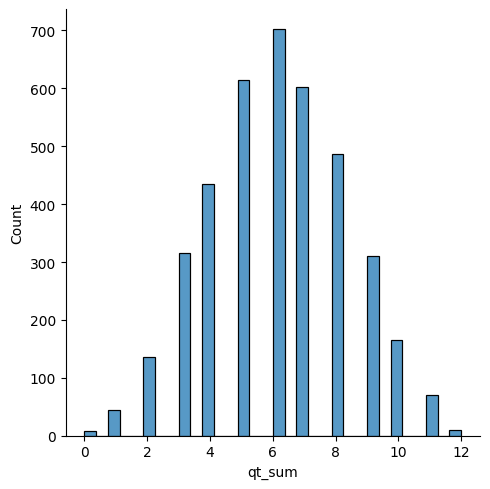

In [58]:
sns.displot(df_a["qt_sum"])

In [61]:
df_a

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Review Rating Category
0,1,53,14,3,0
1,2,64,2,3,0
2,3,73,23,4,0
3,4,90,49,4,1
4,5,49,31,0,0
...,...,...,...,...,...
3895,3896,28,32,4,2
3896,3897,49,41,3,2
3897,3898,33,24,1,0
3898,3899,77,24,4,1


In [72]:
v_df = df1.loc[df1["qt_sum"] >= 8, ["Item Purchased_new", "location_new", "Season"]]

In [99]:
v_df

,Item Purchased_new,location_new,Season
3,shoes,Northeast,Spring
6,tops,West,Fall
12,outers,South,Winter
13,bottoms,Northeast,Spring
14,outers,Northeast,Winter
...,...,...,...
3886,accessories,Midwest,Summer
3893,wear_acc,Northeast,Fall
3895,tops,South,Summer
3896,bags,Midwest,Spring


<Figure size 160000x60000 with 0 Axes>

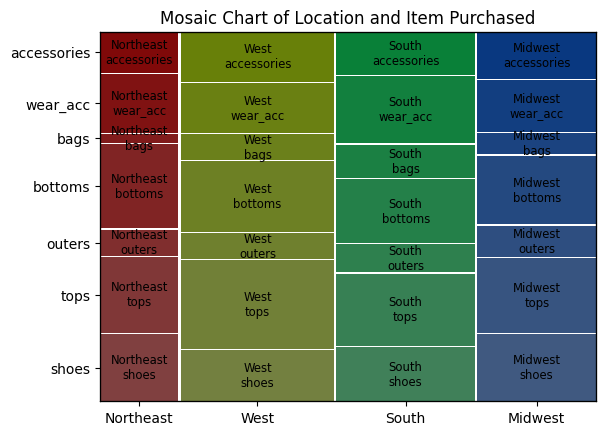

In [105]:
plt.figure(figsize=(1600, 600))
mosaic(v_df, ['location_new', 'Item Purchased_new'])
plt.title('Mosaic Chart of Location and Item Purchased')
plt.show()

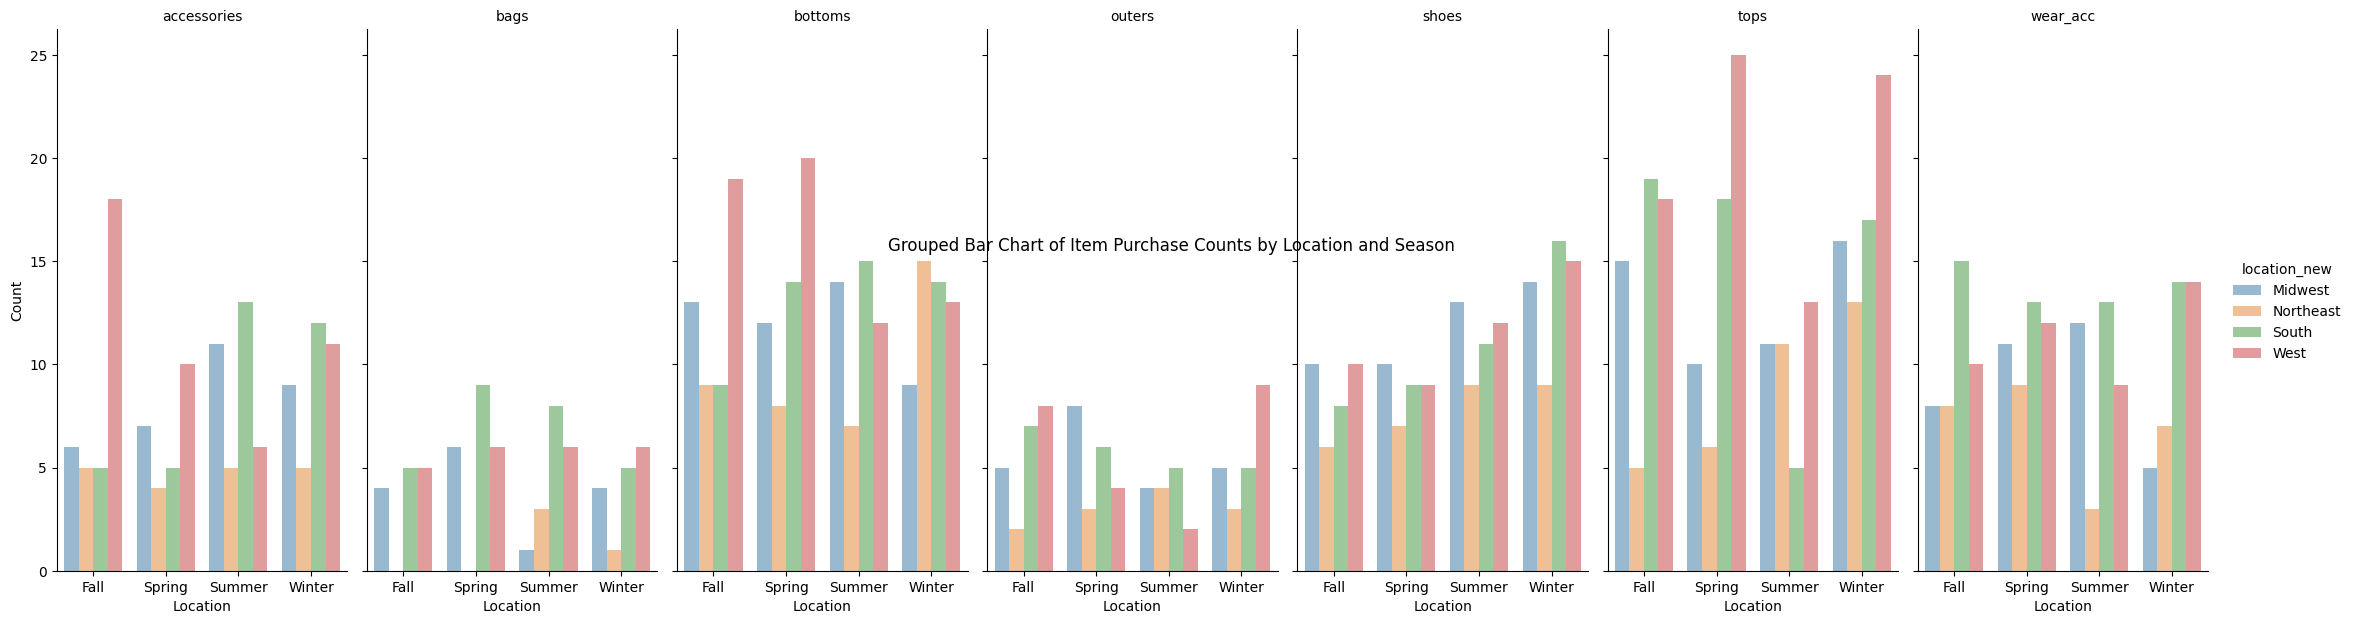

In [141]:
df_counts = v_df.groupby(['location_new', 'Season', 'Item Purchased_new']).size().reset_index(name='counts')

g = sns.catplot(
    data=df_counts, 
    x='Season', 
    y='counts', 
    hue='location_new', 
    col='Item Purchased_new', 
    kind='bar', 
    height=4, 
    aspect=.8,
    alpha = 0.5,
)
g.set_titles("{col_name}")
g.set_axis_labels("Location", "Count")
plt.subplots_adjust(top=1.5)
g.fig.suptitle('Grouped Bar Chart of Item Purchase Counts by Location and Season')

plt.show()

In [ ]:
g = sns.FacetGrid(v_df, col="location_new", row="Season")

g = g.map(plt.hist, "Item Purchased_new")

plt.show()

In [8]:
pp_q80 = df['Previous Purchases'].quantile(0.8)
pp_q60 = df['Previous Purchases'].quantile(0.6)
pp_q40 = df['Previous Purchases'].quantile(0.4)
pp_q20 = df['Previous Purchases'].quantile(0.2)

def Previous_Purchases_score(x, df):
    
    if x >= pp_q80:
        return 5
    elif x >= pp_q60:
        return 4
    elif x >= pp_q40:
        return 3
    elif x >= pp_q20:
        return 2
    else:
        return 1
df['Previous Purchases Score'] = df['Previous Purchases'].apply(lambda x: Previous_Purchases_score(x, df))

In [9]:
def Frequency_Purchases_Score(x):
    if x == 'Weekly':
        return 5
    elif x in ['Bi-Weekly', 'Fortnightly']:
        return 4
    elif x == 'Monthly':
        return 3
    elif x in ['Quarterly', 'Every 3 Months']:
        return 2
    elif x == 'Annually':
        return 1
df['Frequency Purchases Score'] = df['Frequency of Purchases'].apply(lambda x : Frequency_Purchases_Score(x))

In [10]:

df['Total_Amount'] = df['Purchase Amount (USD)'] * (df['Previous Purchases'] + 1)
tpas_q80 = df['Total_Amount'].quantile(0.8)
tpas_q60 = df['Total_Amount'].quantile(0.6)
tpas_q40 = df['Total_Amount'].quantile(0.4)
tpas_q20 = df['Total_Amount'].quantile(0.2)

def Total_Purchases_Amount_Score(x,df):
    if x >= tpas_q80:
        return 5
    elif x >= tpas_q60:
        return 4
    elif x >= tpas_q40:
        return 3
    elif x >= tpas_q20:
        return 2
    else:
        return 1
df['Total_Purchases_Amount_Score'] = df['Total_Amount'].apply(lambda x : Total_Purchases_Amount_Score(x,df))

In [11]:
df['Total Score'] = df['Previous Purchases Score'] + df['Frequency Purchases Score'] + df['Total_Purchases_Amount_Score']

In [12]:
def classify_customer(row):
    if (row['Previous Purchases'] <= 5) and (row['Frequency of Purchases'] in ['Weekly', 'Bi-Weekly','Fortnightly','Monthly']):
        return 'New Customer' # 신규 고객
    elif (row['Previous Purchases'] <= 5) and (row['Frequency of Purchases'] == 'Annually'):
        return 'InActive Customer' # 장기 미접속
    elif row['Total Score'] >= 13: # Loyal
        return 'Loyal Customer'
    elif row['Total Score'] <= 5: # Light
        return 'Light Customer'
    else:
        return 'Regural Customer'

df['Customer Type'] = df.apply(classify_customer, axis = 1)



In [87]:
df_rrc_2 = df.loc[:, ["Review Rating Category", "Customer Type"]]

In [94]:
df_rrc_2

,Review Rating Category,Customer Type
0,low,Regural Customer
1,low,New Customer
2,low,Regural Customer
3,middle,Loyal Customer
4,low,Regural Customer
...,...,...
3895,high,Regural Customer
3896,high,Loyal Customer
3897,low,Regural Customer
3898,middle,Regural Customer


In [90]:
lolay_new_counts = df[(df_rrc_2["Customer Type"]=="Loyal Customer") | (df_rrc_2["Customer Type"]== "New Customer")]
lolay_new = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size().unstack(fill_value=0)

/tmp/ipykernel_814/2092654029.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lolay_new = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size().unstack(fill_value=0)


In [91]:
total_counts = df_rrc_2.groupby(['Review Rating Category']).size()

/tmp/ipykernel_814/3514764461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_rrc_2.groupby(['Review Rating Category']).size()


In [92]:
lolay_new1 = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size()
total_counts1 = df_rrc_2.groupby(['Review Rating Category']).size()

/tmp/ipykernel_814/3947157083.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lolay_new1 = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size()
/tmp/ipykernel_814/3947157083.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts1 = df_rrc_2.groupby(['Review Rating Category']).size()


In [95]:
ln_per_total = (lolay_new1/total_counts1).unstack()

In [96]:
ln_per_total

Customer Type,Loyal Customer,New Customer
Review Rating Category,,
low,0.117530,0.061753
middle,0.127135,0.069576
high,0.141445,0.054753


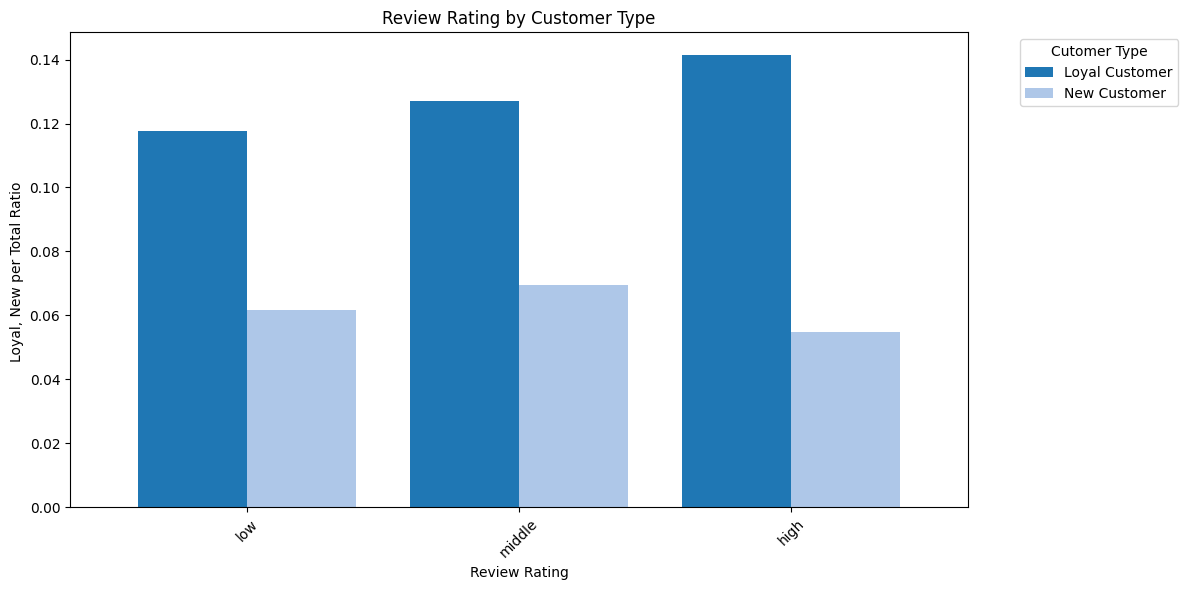

In [130]:


ln_per_total.plot(kind='bar', figsize=(12, 6), width=0.8, color=plt.cm.tab20.colors, stacked=False)
plt.title('Review Rating by Customer Type')
plt.ylabel('Loyal, New per Total Ratio ')
plt.xlabel('Review Rating')
plt.xticks(rotation=45)
plt.legend(title='Cutomer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

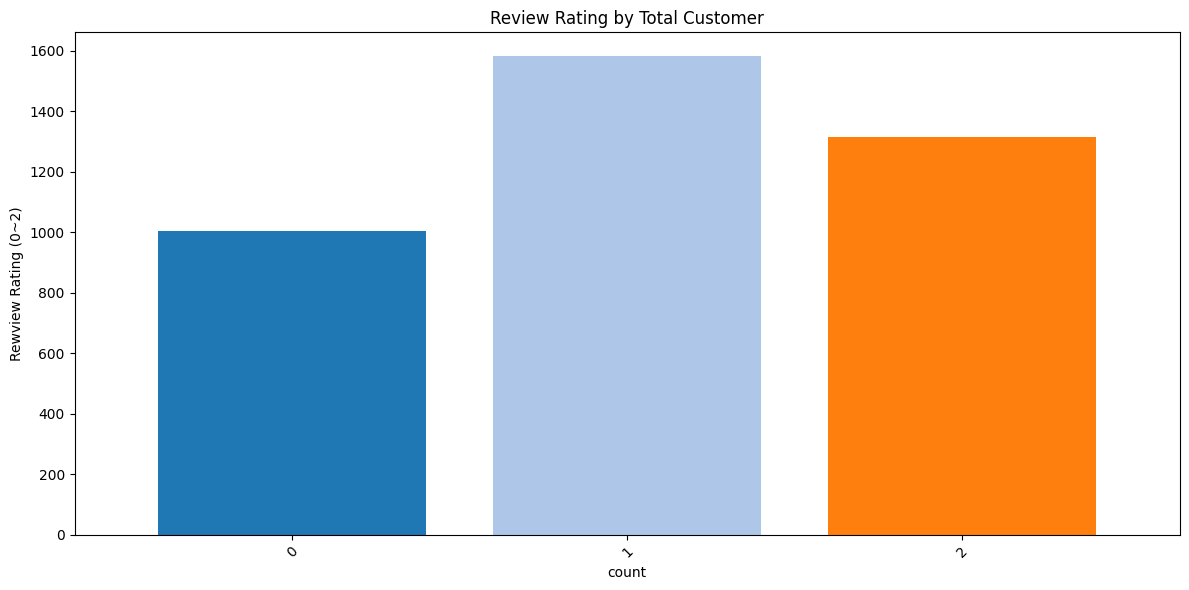

In [65]:
total_counts.plot(kind='bar', figsize=(12, 6), width=0.8, color=plt.cm.tab20.colors, stacked=False)
plt.title('Review Rating by Total Customer')
plt.ylabel('Rewview Rating (0~2)')
plt.xlabel('count')
plt.xticks(rotation=45)
#plt.legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
tc

Customer Type
Review Rating Category


In [13]:
ts_q100 = df["Total Score"].quantile(1)
ts_q75 = df["Total Score"].quantile(0.75)
ts_q50 = df["Total Score"].quantile(0.50)
ts_q25 = df["Total Score"].quantile(0.25)
ts_q0 = df["Total Score"].quantile(0)

In [14]:
df1.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new,Review Rating Category
0,0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,...,Express,1,1,14,Venmo,Fortnightly,tops,50s,South,0
1,1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,...,Express,1,1,2,Cash,Fortnightly,tops,10-20s,Northeast,0
2,2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,...,Free Shipping,1,1,23,Credit Card,Weekly,bottoms,50s,Northeast,0
3,3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,...,Next Day Air,1,1,49,PayPal,Weekly,shoes,10-20s,Northeast,1
4,4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,...,Free Shipping,1,1,31,PayPal,Annually,tops,40s,West,0


In [15]:
print(ts_q0, ts_q25, ts_q50, ts_q75, ts_q100)

3.0 7.0 9.0 11.0 15.0


In [16]:
loyal_df = df1.loc[df['Customer Type'] =='Loyal Customer', ["Item Purchased_new", "location_new", "Season"]]
new_df = df1.loc[df['Customer Type'] =='New Customer', ["Item Purchased_new", "location_new", "Season"]]
inactive_df = df1.loc[df['Customer Type'] =='InActive Customer', ["Item Purchased_new", "location_new", "Season"]]
light_df = df1.loc[df['Customer Type'] =='Light Customer', ["Item Purchased_new", "location_new", "Season"]]
regural_df = df1.loc[df['Customer Type'] =='Regural Customer', ["Item Purchased_new", "location_new", "Season"]]

In [24]:
loyal_df.to_csv("loyal.csv")
new_df.to_csv("new.csv")

In [17]:
loyal_df.head()

,Item Purchased_new,location_new,Season
3,shoes,Northeast,Spring
12,outers,South,Winter
13,bottoms,Northeast,Spring
14,outers,Northeast,Winter
19,bottoms,Northeast,Summer


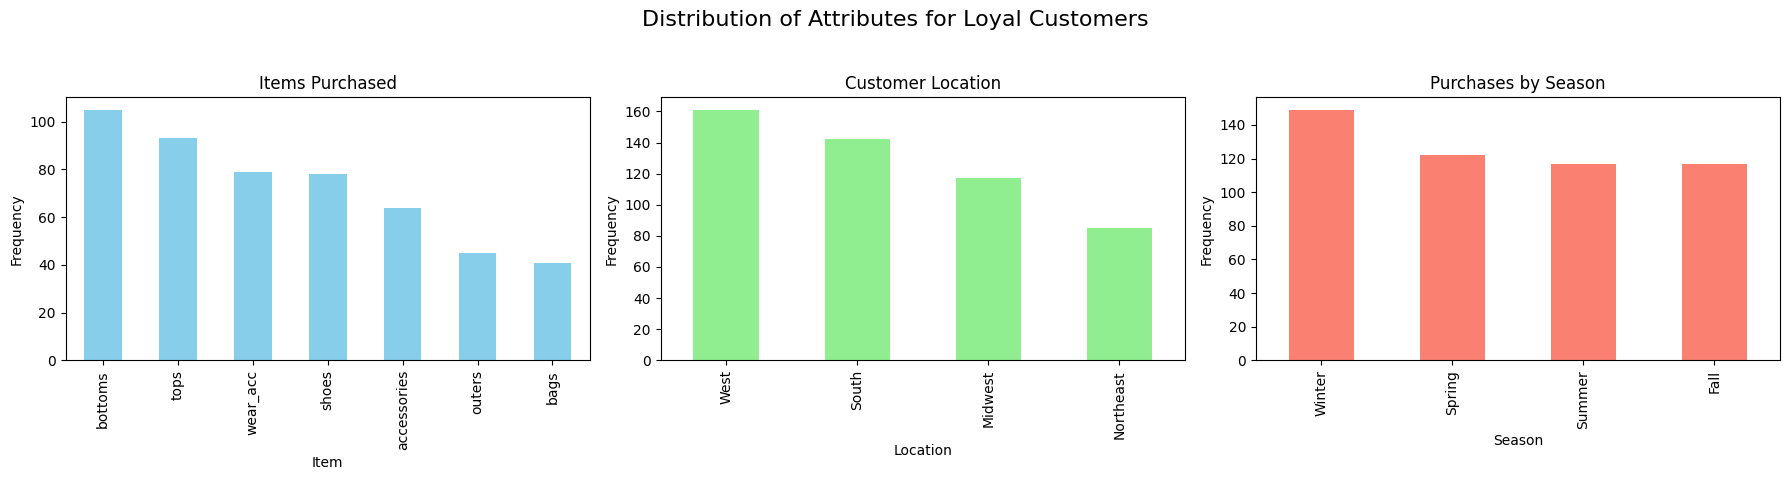

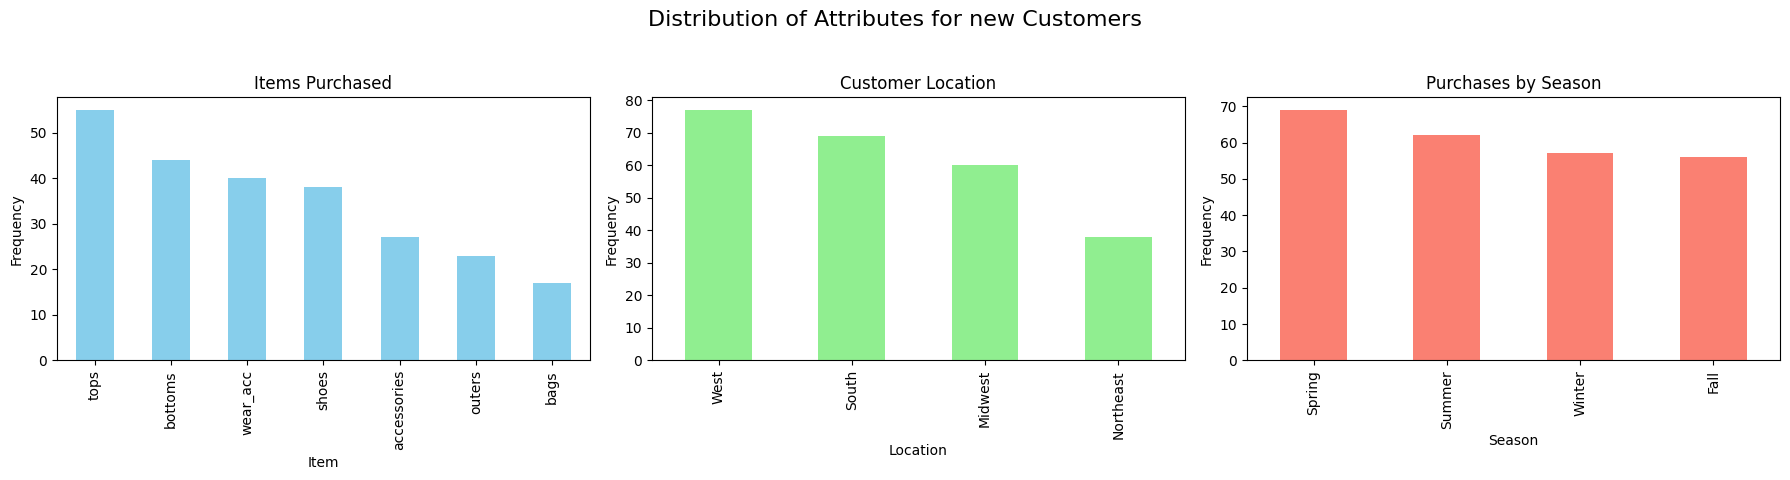

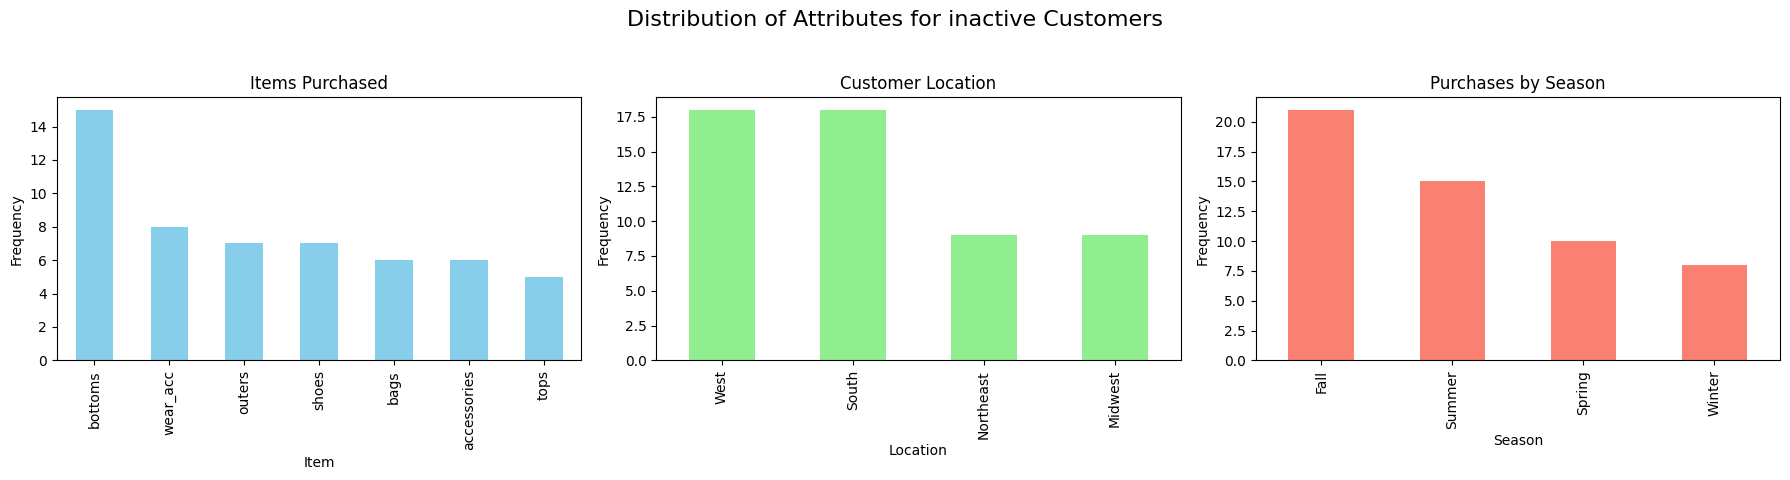

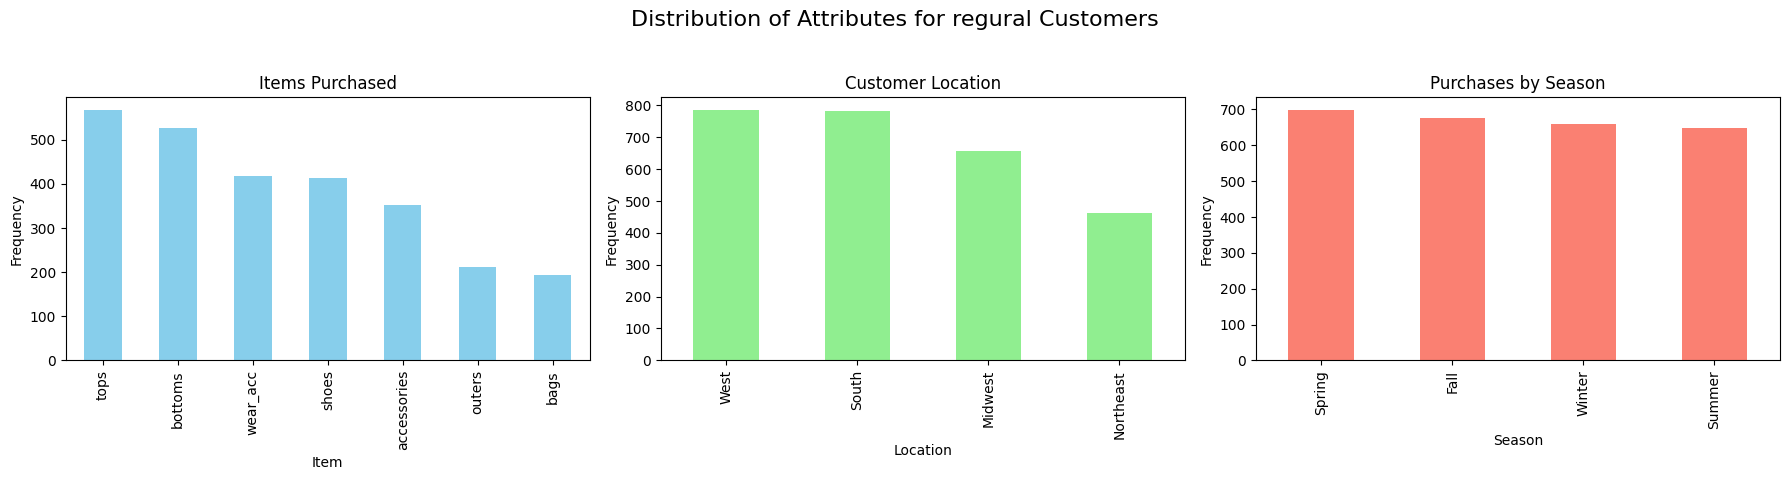

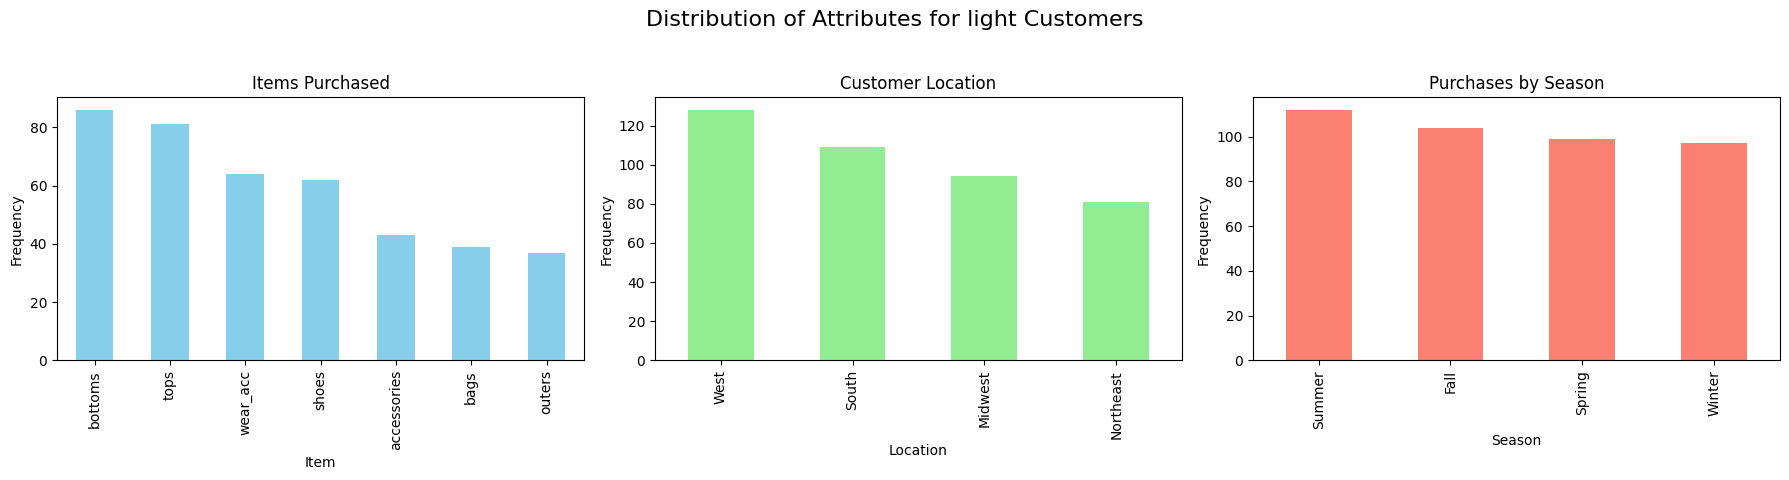

In [69]:
def plot_dataframe(df, df_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Distribution of Attributes for {df_name}', fontsize=16)

    # Plot for Item Purchased_new
    df['Item Purchased_new'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Items Purchased')
    axes[0].set_xlabel('Item')
    axes[0].set_ylabel('Frequency')

    # Plot for location_new
    df['location_new'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_title('Customer Location')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Frequency')

    # Plot for Season
    df['Season'].value_counts().plot(kind='bar', ax=axes[2], color='salmon')
    axes[2].set_title('Purchases by Season')
    axes[2].set_xlabel('Season')
    axes[2].set_ylabel('Frequency')

    # Display the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the function with our example dataframe
plot_dataframe(loyal_df, "Loyal Customers")
plot_dataframe(new_df, "new Customers")
plot_dataframe(inactive_df, "inactive Customers")
plot_dataframe(regural_df, "regural Customers")
plot_dataframe(light_df,"light Customers")

plt.show()

'All plots have been saved to a single image!'

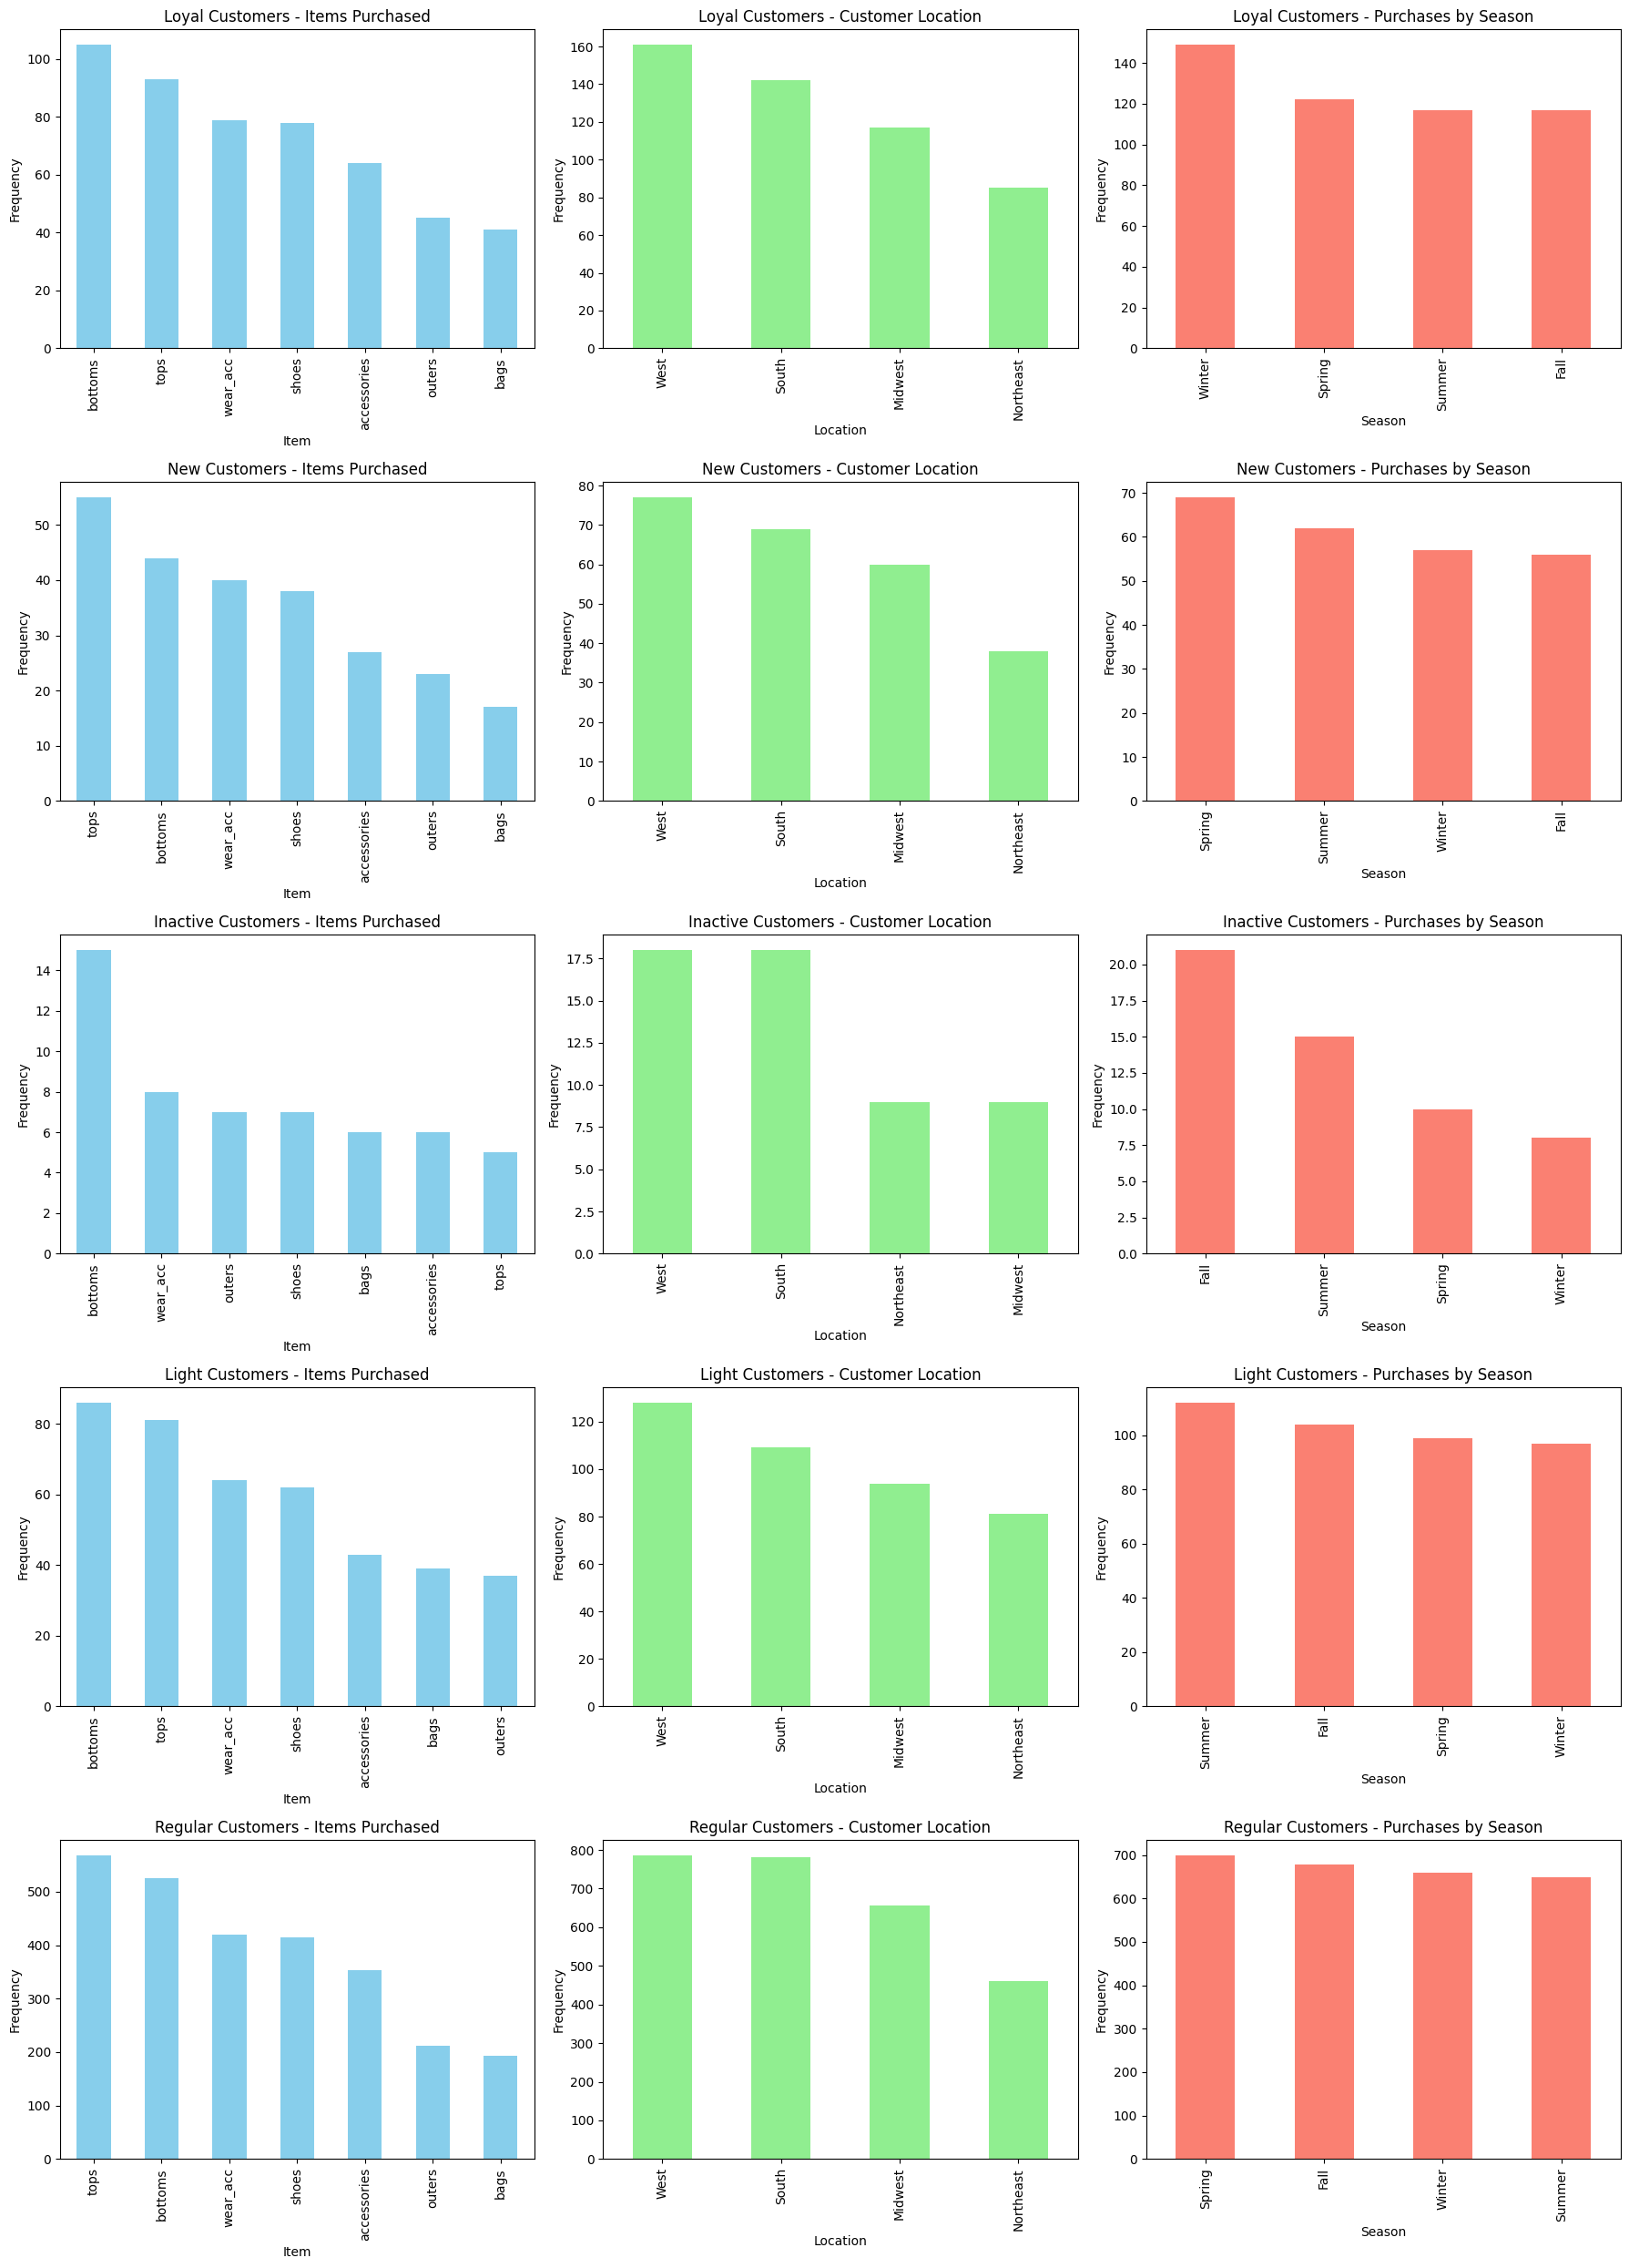

In [53]:
dfs = {
    'Loyal Customers': loyal_df,
    'New Customers': new_df,  # Assuming we have similar dataframes for different customer types
    'Inactive Customers': inactive_df,
    'Light Customers': light_df,
    'Regular Customers': regural_df
}

# We will create a 5x3 grid of subplots (5 customer types, 3 plots each)
fig, axes = plt.subplots(len(dfs), 3, figsize=(18, 5 * len(dfs)))

# Loop through the dataframes and create the plots
for i, (df_name, df) in enumerate(dfs.items()):
    # Plot for Item Purchased_new
    df['Item Purchased_new'].value_counts().plot(kind='bar', ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{df_name} - Items Purchased')
    axes[i, 0].set_xlabel('Item')
    axes[i, 0].set_ylabel('Frequency')

    # Plot for location_new
    df['location_new'].value_counts().plot(kind='bar', ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'{df_name} - Customer Location')
    axes[i, 1].set_xlabel('Location')
    axes[i, 1].set_ylabel('Frequency')

    # Plot for Season
    df['Season'].value_counts().plot(kind='bar', ax=axes[i, 2], color='salmon')
    axes[i, 2].set_title(f'{df_name} - Purchases by Season')
    axes[i, 2].set_xlabel('Season')
    axes[i, 2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
fig.tight_layout()

# Save the figure as a single image


# Display a message that the file has been saved
"All plots have been saved to a single image!"

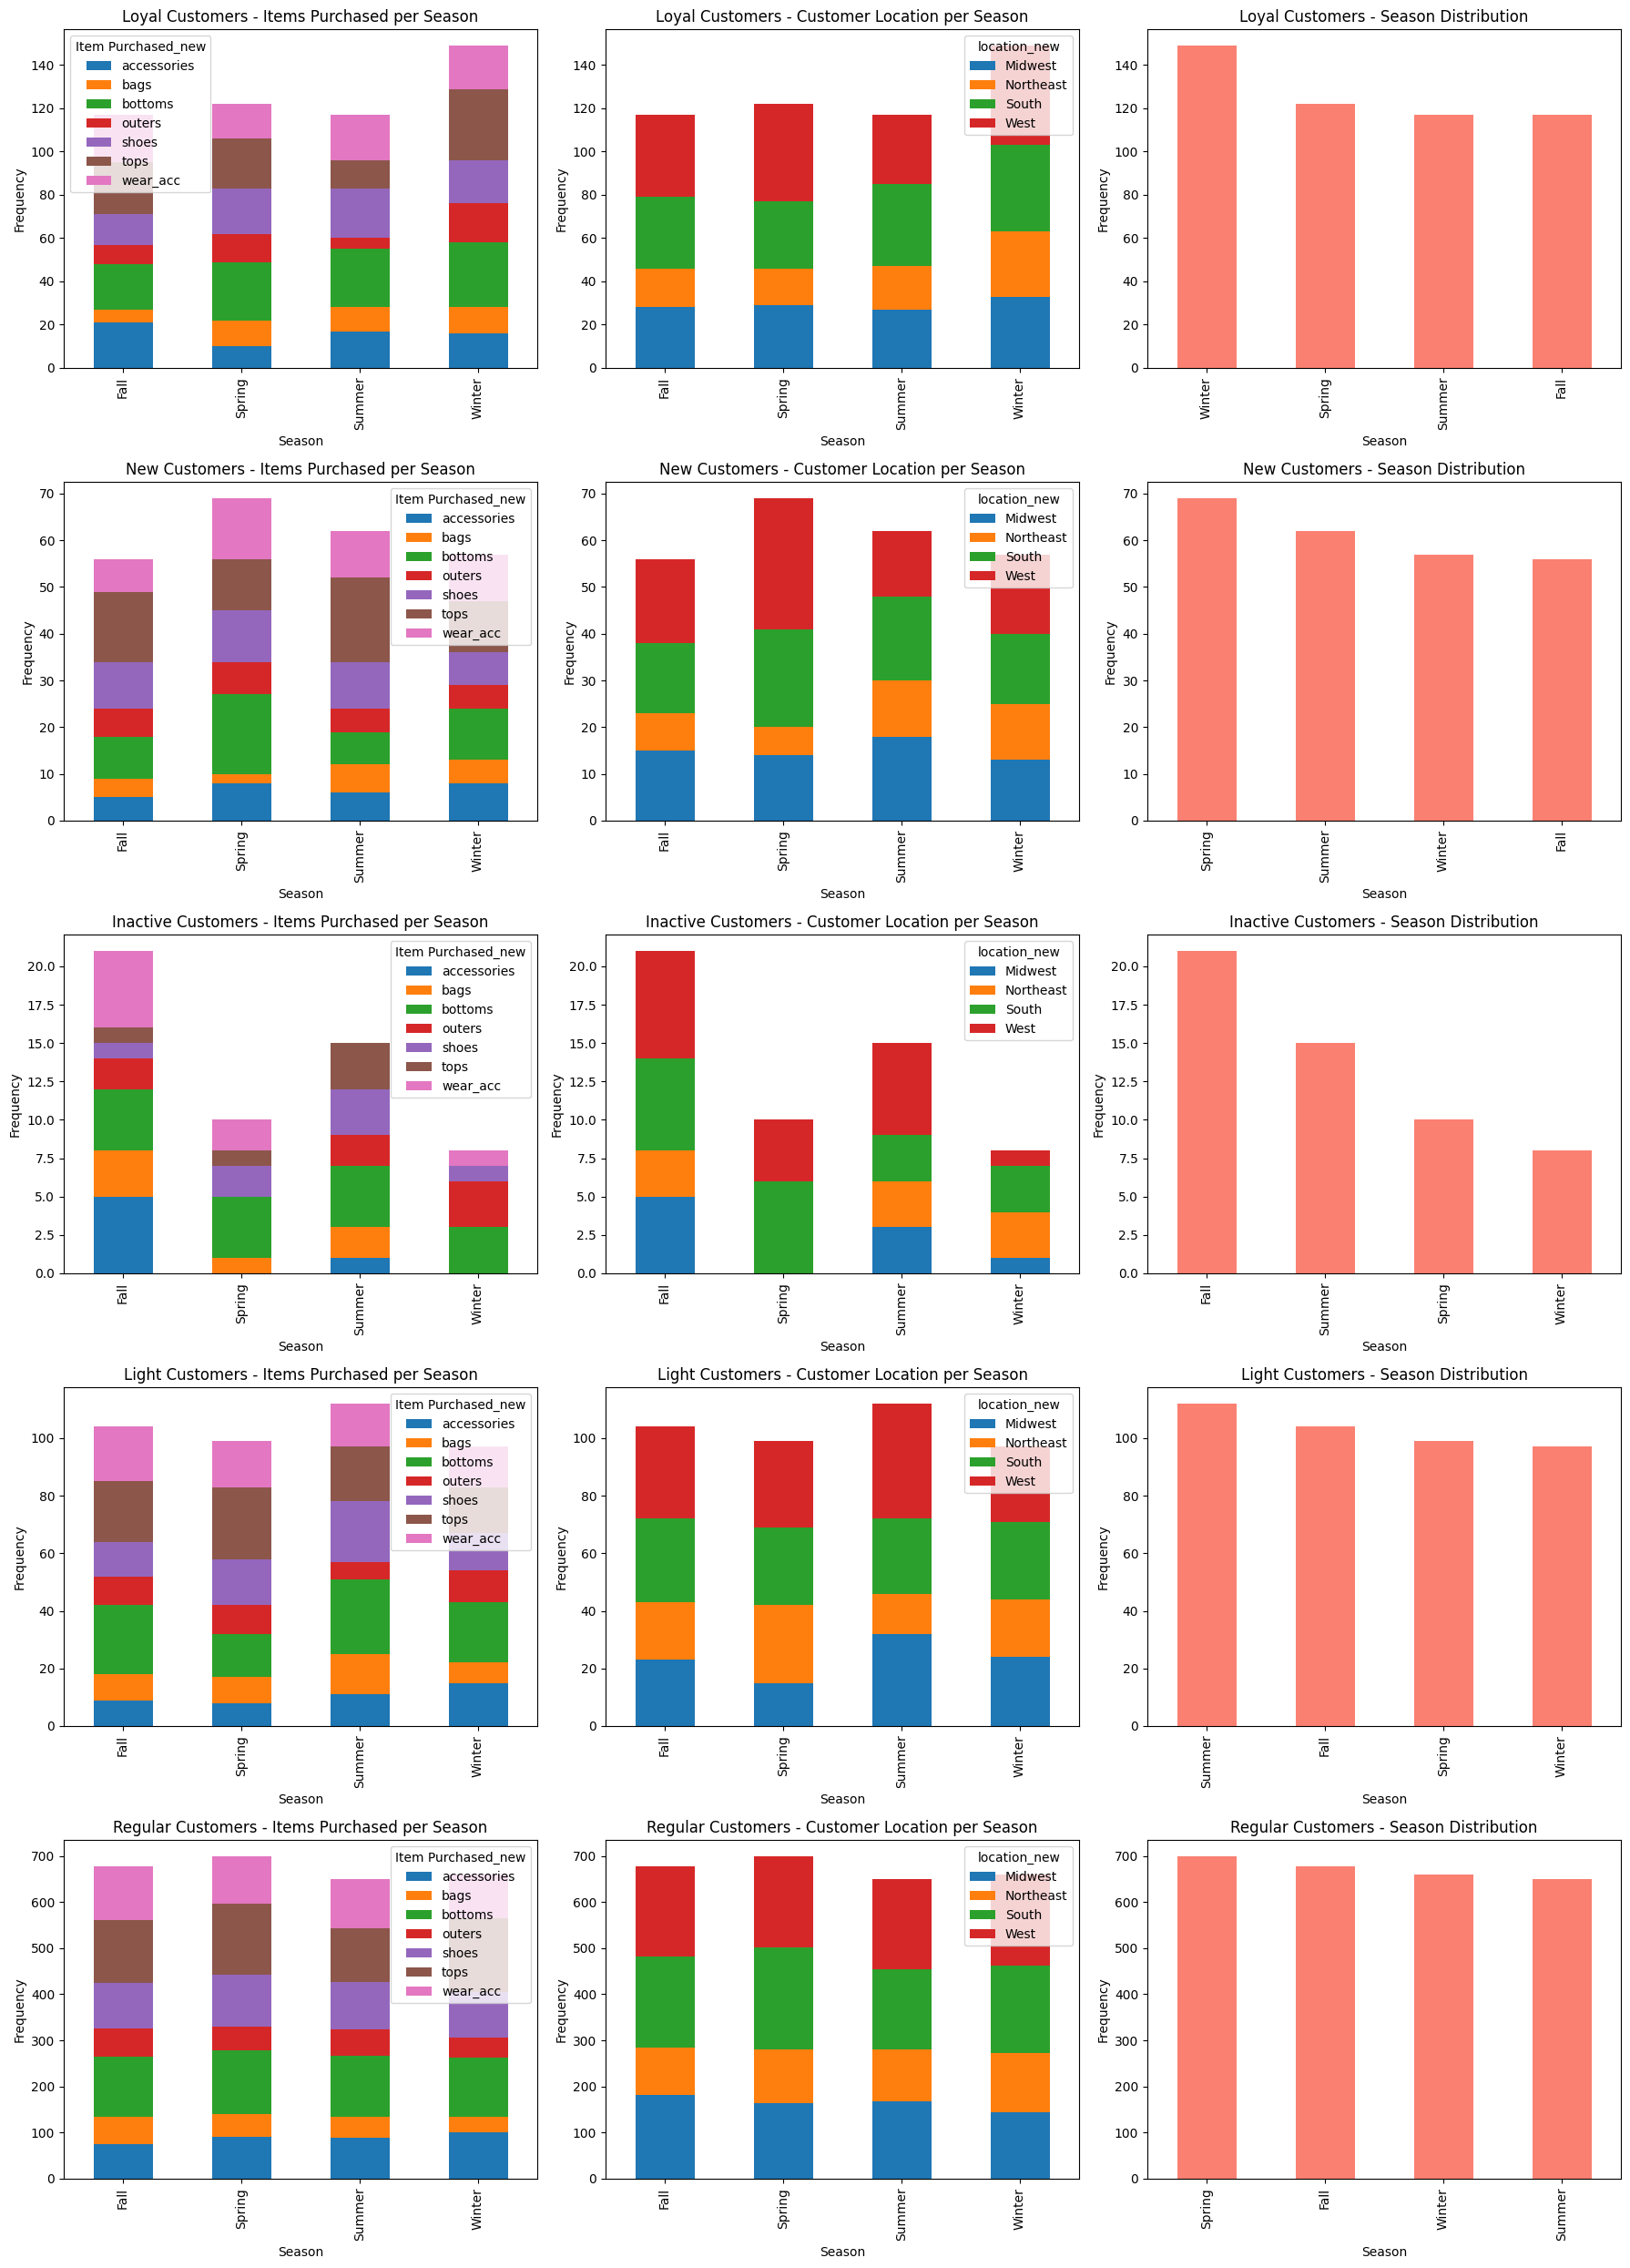

In [60]:
fig, axes = plt.subplots(len(dfs), 3, figsize=(18, 5 * len(dfs)))

# Loop through the dataframes and create the plots with 'Season' on the x-axis
for i, (df_name, df) in enumerate(dfs.items()):
    # For each season, count the number of each item purchased
    season_item_count = df.groupby('Season')['Item Purchased_new'].value_counts().unstack().fillna(0)
    
    # Plot for Items Purchased per Season
    season_item_count.plot(kind='bar', ax=axes[i, 0], stacked=True)
    axes[i, 0].set_title(f'{df_name} - Items Purchased per Season')
    axes[i, 0].set_xlabel('Season')
    axes[i, 0].set_ylabel('Frequency')
    
    # For each season, count the number of each location
    season_location_count = df.groupby('Season')['location_new'].value_counts().unstack().fillna(0)
    
    # Plot for Customer Location per Season
    season_location_count.plot(kind='bar', ax=axes[i, 1], stacked=True)
    axes[i, 1].set_title(f'{df_name} - Customer Location per Season')
    axes[i, 1].set_xlabel('Season')
    axes[i, 1].set_ylabel('Frequency')
    
    # Simply plot the Season distribution for the given customer type
    df['Season'].value_counts().plot(kind='bar', ax=axes[i, 2], color='salmon')
    axes[i, 2].set_title(f'{df_name} - Season Distribution')
    axes[i, 2].set_xlabel('Season')
    axes[i, 2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
fig.tight_layout()

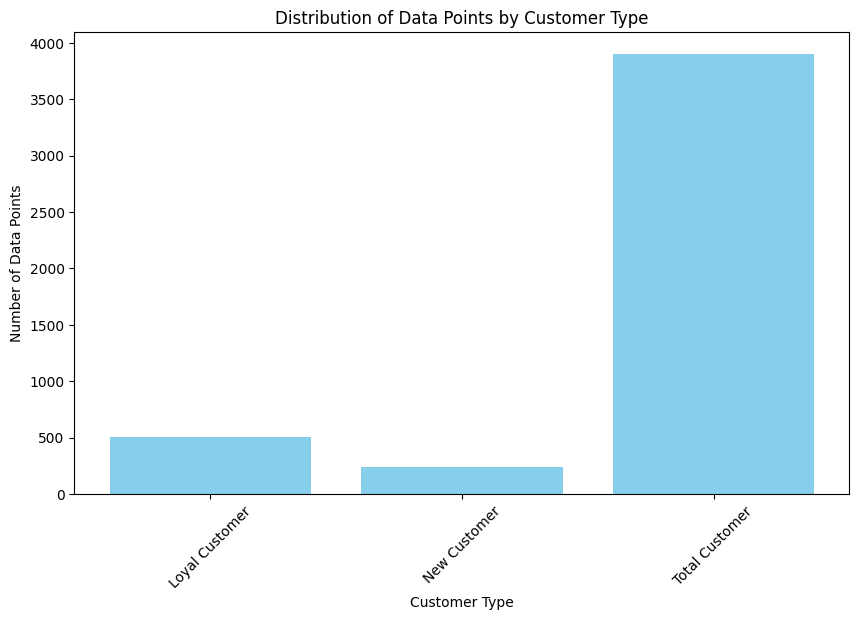

In [22]:
customer_types = ['Loyal Customer', 'New Customer', 'Total Customer']
customer_counts = [len(loyal_df), len(new_df), len(df1)]

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
plt.bar(customer_types, customer_counts, color='skyblue')
plt.xlabel('Customer Type')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points by Customer Type')
plt.xticks(rotation=45)
plt.show()

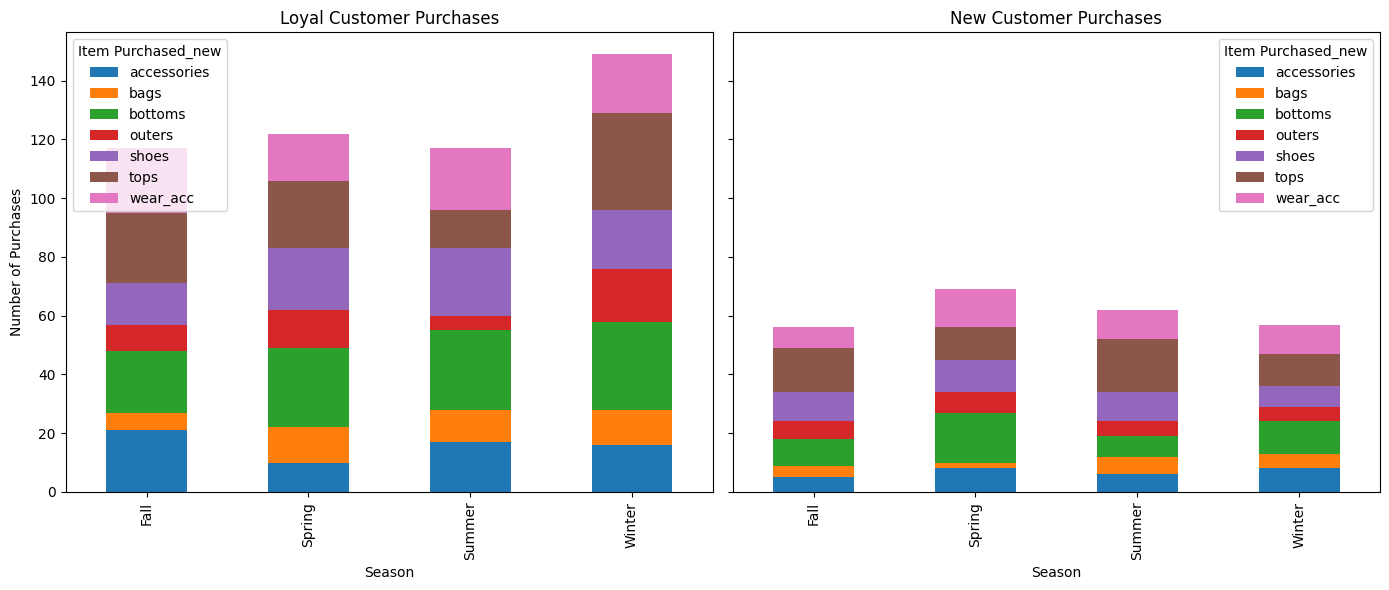

In [29]:
# 계절별, 상품별 구매수를 집계합니다.
loyal_counts = loyal_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)
new_counts = new_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

# 계절별, 상품별 구매수를 시각화합니다.
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Loyal Customer
loyal_counts.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('Loyal Customer Purchases')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Number of Purchases')

# New Customer
new_counts.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('New Customer Purchases')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Purchases')

plt.tight_layout()
plt.show()

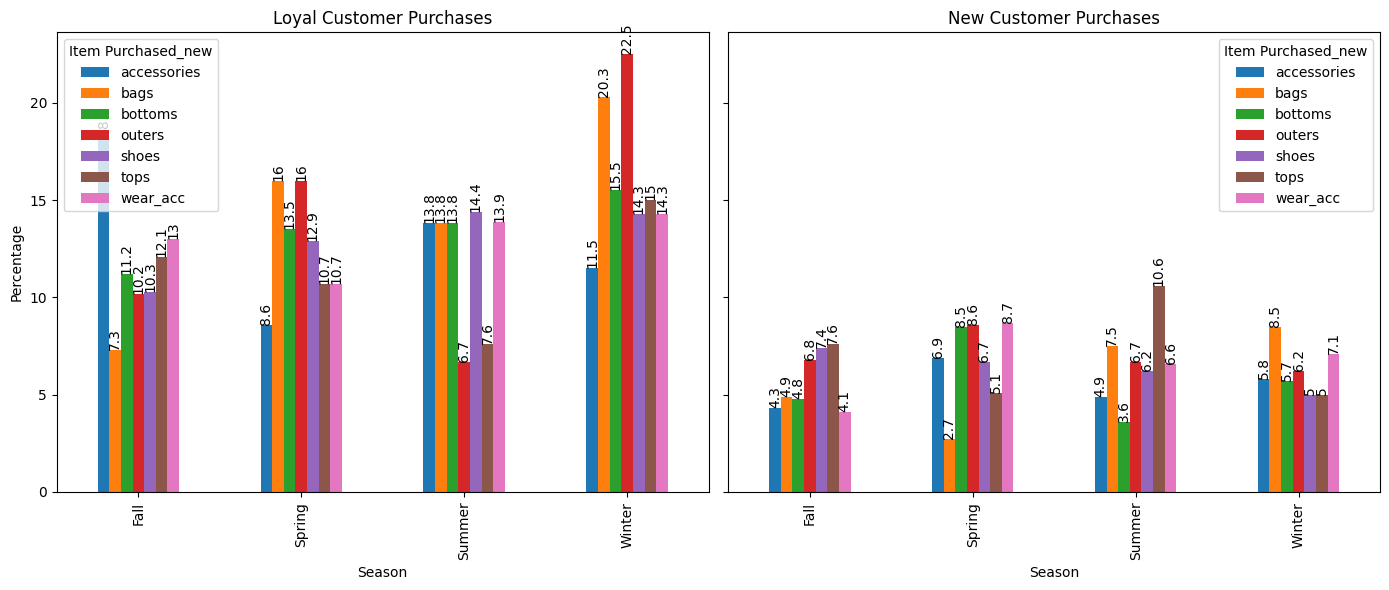

In [131]:
loyal_counts1 = loyal_df.groupby(['Season', 'Item Purchased_new']).size()
new_counts1 = new_df.groupby(['Season', 'Item Purchased_new']).size()
total_counts2 = df.groupby(['Season', 'Item Purchased_new']).size()
l_p_t = (loyal_counts1/total_counts2)*100
n_p_t = (new_counts1/total_counts2)*100
l_p_t.unstack(fill_value=0)
n_p_t.unstack(fill_value=0)
# 계절별, 상품별 구매수를 집계합니다.
loyal_counts3 = l_p_t.groupby(['Season', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)
new_counts3 = n_p_t.groupby(['Season', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)

# 계절별, 상품별 구매수를 시각화합니다.
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Loyal Customer 구매 데이터를 바 차트로 표시
loyal_counts3.plot(kind='bar', ax=axes[0], stacked=False)
axes[0].set_title('Loyal Customer Purchases')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Percentage')

# New Customer 구매 데이터를 바 차트로 표시
new_counts3.plot(kind='bar', ax=axes[1], stacked=False)
axes[1].set_title('New Customer Purchases')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Percentage')

# Loyal Customer 차트에서 각 막대에 대한 값 표시
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge', rotation=90)

# New Customer 차트에서 각 막대에 대한 값 표시
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', rotation=90)

plt.tight_layout()
plt.show()

In [99]:
loyal_counts1 = loyal_df.groupby(['Season', 'Item Purchased_new']).size()
new_counts1 = new_df.groupby(['Season', 'Item Purchased_new']).size()
total_counts2 = df.groupby(['Season', 'Item Purchased_new']).size()

In [101]:
l_p_t = loyal_counts1/total_counts2
n_p_t = new_counts1/total_counts2
l_p_t.unstack()
n_p_t.unstack()

Item Purchased_new,accessories,bags,bottoms,outers,shoes,tops,wear_acc
Season,,,,,,,
Fall,0.043478,0.048780,0.048128,0.068182,0.073529,0.075758,0.041420
Spring,0.068966,0.026667,0.085000,0.086420,0.067485,0.051402,0.086667
Summer,0.048780,0.075000,0.035714,0.066667,0.062500,0.105882,0.066225
Winter,0.057554,0.084746,0.056995,0.062500,0.050000,0.050000,0.071429


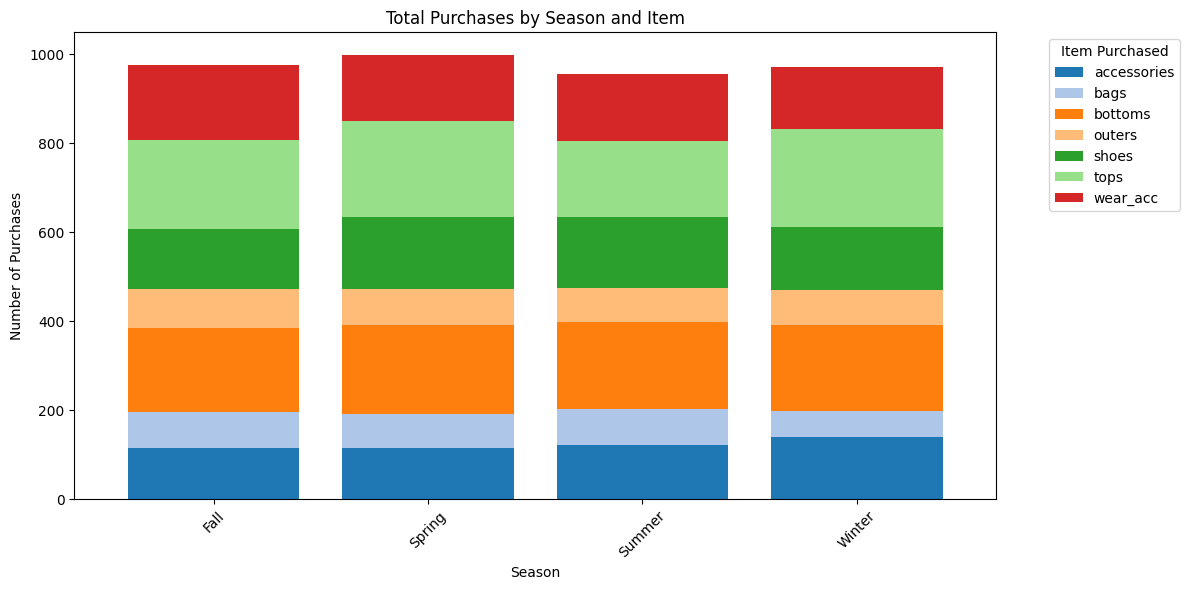

In [31]:

total_counts = df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

total_counts.plot(kind='bar', figsize=(12, 6), width=0.8, color=plt.cm.tab20.colors, stacked=True)
plt.title('Total Purchases by Season and Item')
plt.ylabel('Number of Purchases')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

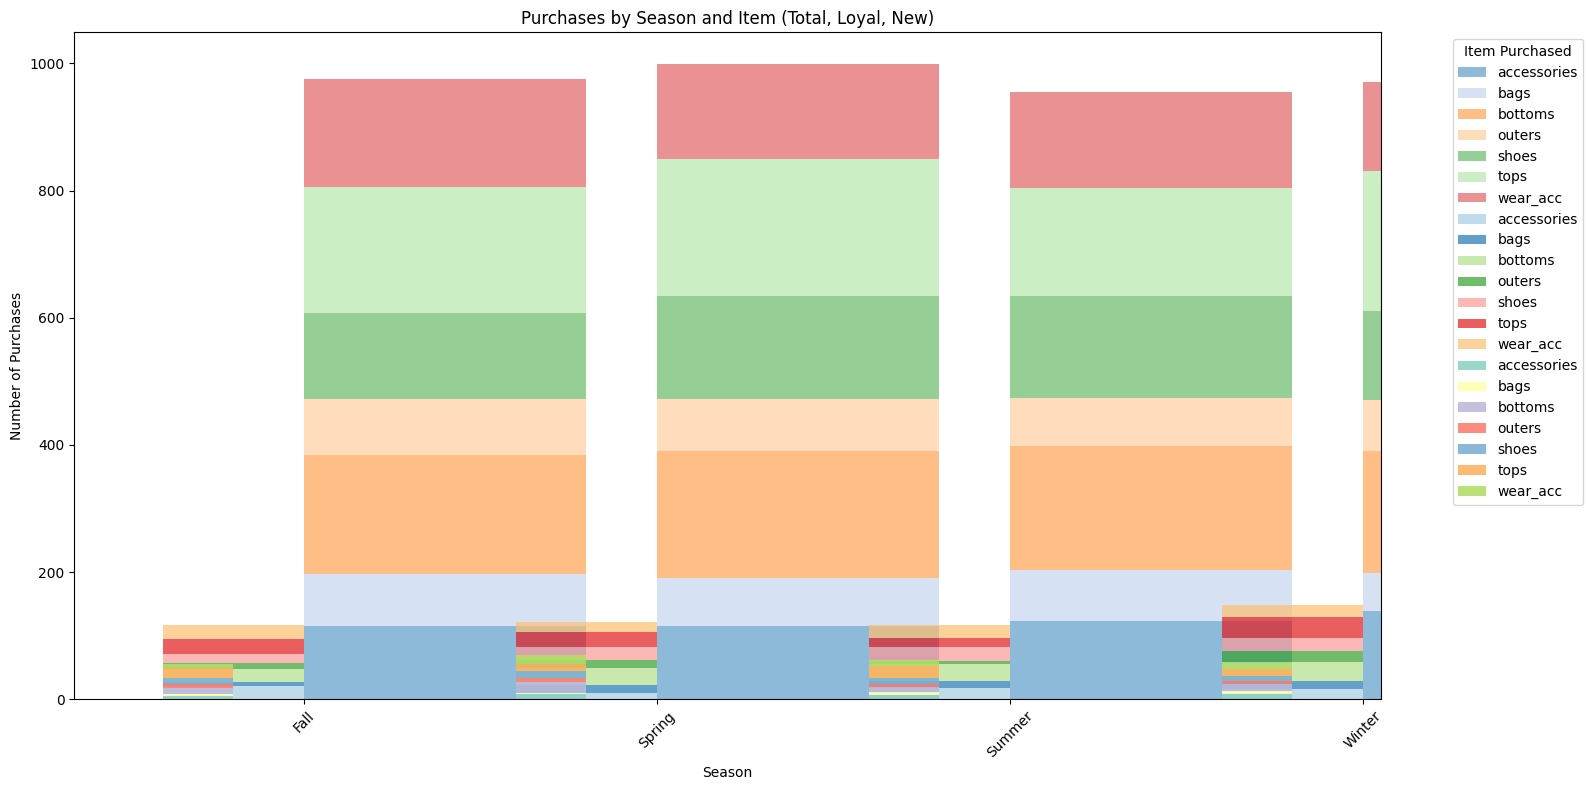

In [28]:
total_counts_combined = df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

# Loyal 과 New 데이터프레임에서 계절별, 상품별 구매수를 집계
loyal_item_season_counts = loyal_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)
new_item_season_counts = new_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

# 바 차트 그리기 - 이번에는 'Customer Type'을 고려하여 전체, Loyal, New 데이터를 함께 표시합니다.
fig, ax = plt.subplots(figsize=(16, 8))

# 전체 데이터셋의 계절별, 상품별 구매수를 바 차트로 표시
total_counts_combined.plot(kind='bar', ax=ax, width=0.8, color=plt.cm.tab20.colors, position=0, label='Total', stacked=True, alpha=0.5)

# Loyal 고객의 계절별, 상품별 구매수를 바 차트로 추가
loyal_item_season_counts.plot(kind='bar', ax=ax, width=0.4, color=plt.cm.Paired(np.arange(len(loyal_item_season_counts.columns))), position=1, label='Loyal', stacked=True, alpha=0.7)

# New 고객의 계절별, 상품별 구매수를 바 차트로 추가
new_item_season_counts.plot(kind='bar', ax=ax, width=0.2, color=plt.cm.Set3(np.arange(len(new_item_season_counts.columns))), position=2, label='New', stacked=True, alpha=0.9)

plt.title('Purchases by Season and Item (Total, Loyal, New)')
plt.ylabel('Number of Purchases')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()